In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from scipy.stats import stats

sns.set_style('white')
%matplotlib inline

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

### Load in processed data from Cedars_Data_Processing.ipynb

In [2]:
df_rel_sort_list = pickle.load(open('pickle_files/rel_sort_lod_list.pkl', 'rb'))
df_abs_sort_list = pickle.load(open('pickle_files/abs_sort_lod_list.pkl', 'rb'))

df_pseudo_rel_sort_list = pickle.load(open('pickle_files/pseudo_rel_sort_lod_list.pkl', 'rb'))
df_pseudo_abs_sort_list = pickle.load(open('pickle_files/pseudo_abs_sort_lod_list.pkl', 'rb'))

df_col_names_list = pickle.load(open('pickle_files/col_names_lod_list.pkl', 'rb'))
df_metadata = pickle.load(open('pickle_files/metadata_all.pkl', 'rb'))

endo_code = pd.DataFrame.from_dict({1:'GERD/dyspepsia workup', 
                  2:'Possible bleeding/anemia workup', 
                  3:'Rule out cancer/polyp', 
                  4:'Biliary disease',
                  5:'Dysphagia',
                  6:"Crohn's disease",
                  7:'Functional GI disease',
                  8:'Rule out Celiac disease',
                  9:'Known peptic ulcer disease',
                  10:'G-tube management',
                  11:'Other',
                  12:'Missing Information'}, orient='index')

### Merge metadata with available sequencing data

In [3]:
df_rel_sort_meta_list = [None]*6
df_abs_sort_meta_list = [None]*6
df_pseudo_rel_sort_meta_list = [None]*6
df_pseudo_abs_sort_meta_list = [None]*6

for i in range(6):
    df_rel_sort_meta_list[i] = df_rel_sort_list[i].merge(df_metadata, left_index=True, right_index=True)
    df_abs_sort_meta_list[i] = df_abs_sort_list[i].merge(df_metadata, left_index=True, right_index=True)
    
    df_pseudo_rel_sort_meta_list[i] = df_pseudo_abs_sort_list[i].merge(df_metadata, left_index=True, right_index=True)
    df_pseudo_abs_sort_meta_list[i] = df_pseudo_rel_sort_list[i].merge(df_metadata, left_index=True, right_index=True)

### Summary Stats

In [5]:
print('Age: ' + str(round(df_abs_sort_meta_list[4]['Age (years)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4]['Age (years)'].std(),2)))

Age: 56.88 + 14.89


In [6]:
print('SIBO Age: ' + str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['Age (years)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['Age (years)'].std(),2)))

SIBO Age: 61.59 + 13.55


In [7]:
print('non-SIBO Age: ' + str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['Age (years)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['Age (years)'].std(),2)))

non-SIBO Age: 55.46 + 15.01


In [8]:
print('Weight (lbs): ' + str(round(df_abs_sort_meta_list[4]['weight (lbs)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4]['weight (lbs)'].std(),2)))

Weight (lbs): 169.42 + 49.51


In [9]:
print('SIBO weight (lbs): ' + str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['weight (lbs)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['weight (lbs)'].std(),2)))

SIBO weight (lbs): 166.1 + 38.69


In [10]:
print('non-SIBO weight (lbs): ' + str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['weight (lbs)'].mean(),2))+' + '+str(round(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['weight (lbs)'].std(),2)))

non-SIBO weight (lbs): 170.42 + 52.39


In [6]:
print('% Female: ' + str(round(len(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['Gender']=='Female'])/250*100,2)))

% Female: 54.0


In [11]:
print('SIBO % Female: ' + str(round(len(df_abs_sort_meta_list[4][(df_abs_sort_meta_list[4]['SIBO']==1)&(df_abs_sort_meta_list[4]['Gender']=='Female')])/58*100,2)))

SIBO % Female: 62.07


In [14]:
print('non-SIBO % Female: ' + str(round(len(df_abs_sort_meta_list[4][(df_abs_sort_meta_list[4]['SIBO']==0)&(df_abs_sort_meta_list[4]['Gender']=='Female')])/192*100,2)))

non-SIBO % Female: 51.56


In [7]:
df_abs_sort_meta_list[4]['antibiotic_past_6_months'].sum()

100.0

In [17]:
df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['antibiotic_past_6_months'].sum()

34.0

In [8]:
df_abs_sort_meta_list[4]['abx_current'].sum()

11

In [22]:
df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['abx_current'].sum()

5

In [9]:
df_abs_sort_meta_list[4]['current_smoker'].sum()

16

In [24]:
df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==1]['current_smoker'].sum()

2

In [10]:
df_abs_sort_meta_list[4]['any_probiotics'].sum()

49

In [29]:
df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['any_probiotics'].sum()

34

In [11]:
df_abs_sort_meta_list[4]['any_PPI'].sum()

106

In [12]:
df_abs_sort_meta_list[4]['Med'].value_counts()

None          144
PPI            86
H2 blocker     10
Both           10
Name: Med, dtype: int64

In [35]:
df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['Med'].value_counts()

None          114
PPI            65
Both            7
H2 blocker      6
Name: Med, dtype: int64

In [13]:
df_abs_sort_meta_list[4]['SIBO'].sum()

58

In [14]:
# Number of patients in each reason for endoscopy category
pd.DataFrame(df_abs_sort_meta_list[4]['Endo Code'].value_counts(normalize=True).sort_index()).merge(endo_code, left_index=True,right_index=True)

Endo Code                                0
1       0.212            GERD/dyspepsia workup
2       0.068  Possible bleeding/anemia workup
3       0.236            Rule out cancer/polyp
4       0.128                  Biliary disease
5       0.096                        Dysphagia
6       0.040                  Crohn's disease
7       0.052            Functional GI disease
8       0.012          Rule out Celiac disease
9       0.012       Known peptic ulcer disease
10      0.008                G-tube management
11      0.032                            Other
12      0.104              Missing Information

In [18]:
# Number of patients in each reason for endoscopy category
pd.DataFrame(df_abs_sort_meta_list[4][df_abs_sort_meta_list[4]['SIBO']==0]['Endo Code'].value_counts(normalize=True).sort_index()).merge(endo_code, left_index=True,right_index=True)

Endo Code                                0
1    0.229167            GERD/dyspepsia workup
2    0.057292  Possible bleeding/anemia workup
3    0.218750            Rule out cancer/polyp
4    0.119792                  Biliary disease
5    0.098958                        Dysphagia
6    0.041667                  Crohn's disease
7    0.062500            Functional GI disease
8    0.005208          Rule out Celiac disease
9    0.015625       Known peptic ulcer disease
10   0.005208                G-tube management
11   0.036458                            Other
12   0.109375              Missing Information

### Age and Sex

In [15]:
age_bracket = []

for age in df_metadata['Age (years)'].tolist():
    if age < 40:
        age_bracket.append('18-39')
    elif age < 50:
        age_bracket.append('40-49')
    elif age < 60:
        age_bracket.append('50-59')
    elif age < 70:
        age_bracket.append('60-69')
    else:
        age_bracket.append('70-83')

df_metadata['Age Bracket'] = age_bracket

In [16]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

Text(0.5, 0, 'Age')

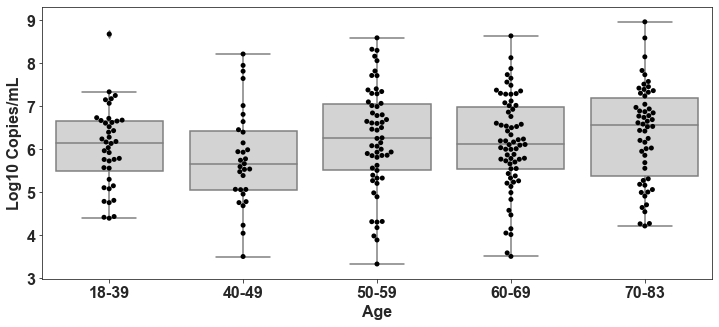

In [17]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)

sns.boxplot(ax=ax1, x='Age Bracket', y='Log Copies/mL', data=df_metadata, order=['18-39', '40-49', '50-59', '60-69', '70-83'], color='lightgrey')
sns.swarmplot(ax=ax1, x='Age Bracket', y='Log Copies/mL', data=df_metadata, order=['18-39', '40-49', '50-59', '60-69', '70-83'], color='k')

ax1.set_ylabel('Log10 Copies/mL', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=16, fontweight='bold')

#fig.savefig('Age_Total_Load.png', bbox_inches='tight', dpi=200)
#fig.savefig('Age_Total_Load.pdf', bbox_inches='tight')

Text(0, 0.5, 'Log10 Copies/mL')

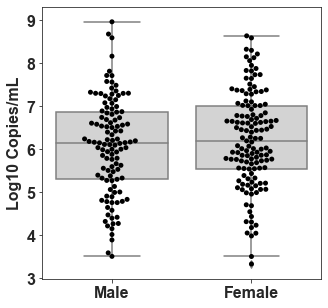

In [18]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

sns.boxplot(ax=ax1, x='Gender', y='Log Copies/mL', data=df_metadata, color='lightgrey', order=['Male', 'Female'])
sns.swarmplot(ax=ax1, x='Gender', y='Log Copies/mL', data=df_metadata, color='k', order=['Male', 'Female'])

ax1.set_xlabel('')
ax1.set_ylabel('Log10 Copies/mL', fontsize=16, fontweight='bold')

#fig.savefig('Gender_Total_Load.png', bbox_inches='tight', dpi=200)
#fig.savefig('Gender_Total_Load.pdf', bbox_inches='tight')

Text(0.5, 0, 'Age')

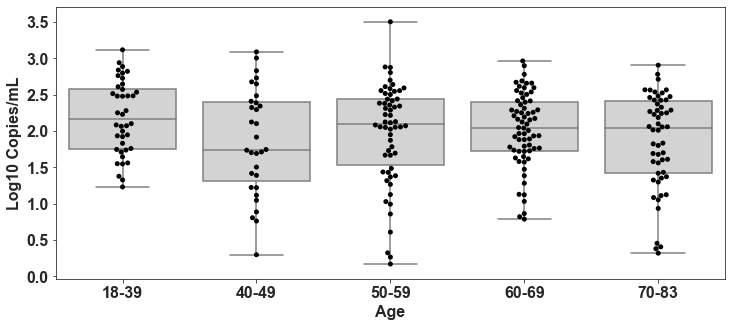

In [19]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)

sns.boxplot(ax=ax1, x='Age Bracket', y='Shannon_Diversity', data=df_metadata, order=['18-39', '40-49', '50-59', '60-69', '70-83'], color='lightgrey')
sns.swarmplot(ax=ax1, x='Age Bracket', y='Shannon_Diversity', data=df_metadata, order=['18-39', '40-49', '50-59', '60-69', '70-83'], color='k')

ax1.set_ylabel('Log10 Copies/mL', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=16, fontweight='bold')

#fig.savefig('Age_Total_Load.png', bbox_inches='tight', dpi=200)
#fig.savefig('Age_Total_Load.pdf', bbox_inches='tight')

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Age')

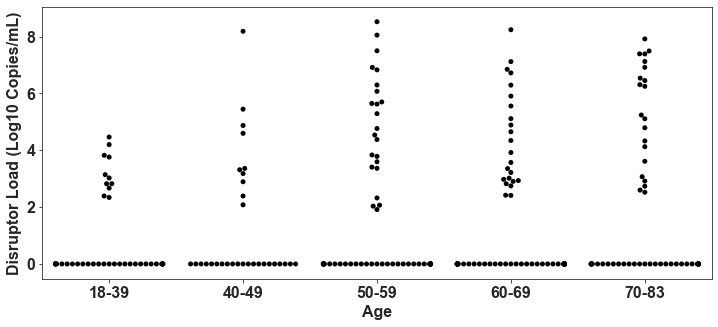

In [20]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)

sns.swarmplot(ax=ax1, x='Age Bracket', y='disruptor sum', data=df_metadata, order=['18-39', '40-49', '50-59', '60-69', '70-83'], color='k')

ax1.set_ylabel('Disruptor Load (Log10 Copies/mL)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age', fontsize=16, fontweight='bold')

#fig.savefig('Age_disruptor_Load.png', bbox_inches='tight', dpi=200)
#fig.savefig('Age_disruptor_Load.pdf', bbox_inches='tight')

In [21]:
df_metadata[df_metadata['disruptor sum']>6]['Age Bracket'].value_counts()

70-83    10
50-59     7
60-69     5
40-49     1
Name: Age Bracket, dtype: int64

### Total microbial load of patients from various subgroups

Text(0.5, 1.0, 'PPI Use')

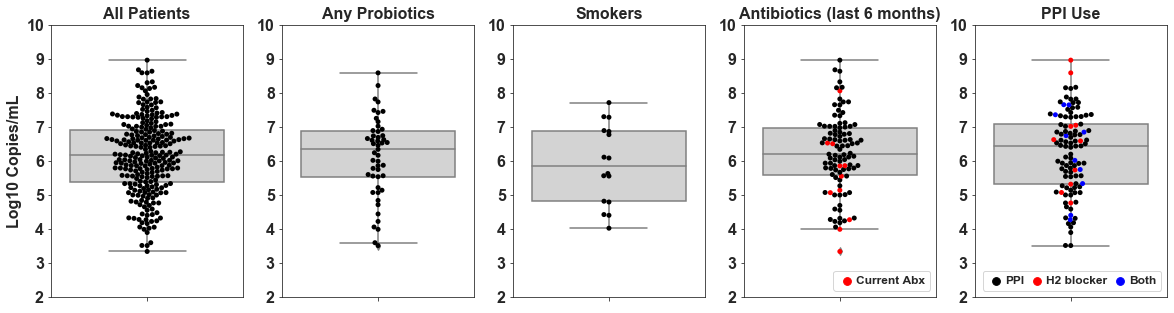

In [22]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

sns.boxplot(ax=ax1, y=df_metadata['Log Copies/mL'], color='lightgrey')
sns.boxplot(ax=ax2, y=df_metadata[df_metadata['any_probiotics']==1]['Log Copies/mL'], color='lightgrey')
sns.boxplot(ax=ax3, y=df_metadata[df_metadata['current_smoker']==1]['Log Copies/mL'], color='lightgrey')
sns.boxplot(ax=ax4, y=df_metadata[df_metadata['antibiotic_past_6_months']==1]['Log Copies/mL'], color='lightgrey')
sns.boxplot(ax=ax5, y=df_metadata[df_metadata['any_PPI']==1]['Log Copies/mL'], color='lightgrey')

sns.swarmplot(ax=ax1, y=df_metadata['Log Copies/mL'], color='k')
sns.swarmplot(ax=ax2, y=df_metadata[df_metadata['any_probiotics']==1]['Log Copies/mL'], color='k')
sns.swarmplot(ax=ax3, y=df_metadata[df_metadata['current_smoker']==1]['Log Copies/mL'], color='k')

_df = df_metadata[df_metadata['antibiotic_past_6_months']==1]

sns.swarmplot(ax=ax4, x='antibiotic_past_6_months', y='Log Copies/mL', data=_df, hue='abx_current', palette=['k', 'red'])

_df = df_metadata[df_metadata['any_PPI']==1]

sns.swarmplot(ax=ax5, y='Log Copies/mL', x='any_PPI', hue='Med', data=_df, palette=['k', 'red', 'blue'], hue_order=['PPI', 'H2 blocker', 'Both'])

h, l = ax4.get_legend_handles_labels()
ax4.legend([h[1]], ['Current Abx'], loc='lower right', fontsize=12, handletextpad=0, handlelength=1.5)

h, l = ax5.get_legend_handles_labels()
ax5.legend(h[0:], l[0:], loc='lower right', fontsize=12, ncol=3, columnspacing=0.3, handletextpad=0, handlelength=1.5)


ax1.set_ylim(2,10)
ax2.set_ylim(2,10)
ax3.set_ylim(2,10)
ax4.set_ylim(2,10)
ax5.set_ylim(2,10)

ax1.set_ylabel('Log10 Copies/mL', fontsize=16, fontweight='bold')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

ax4.set_xlabel('')
ax4.set_xticklabels('')

ax5.set_xlabel('')
ax5.set_xticklabels('')

ax1.set_title('All Patients', fontsize=16, fontweight='bold')
ax2.set_title('Any Probiotics', fontsize=16, fontweight='bold')
ax3.set_title('Smokers', fontsize=16, fontweight='bold')
ax4.set_title('Antibiotics (last 6 months)', fontsize=16, fontweight='bold')
ax5.set_title('PPI Use', fontsize=16, fontweight='bold')

#fig.savefig('Condition_Total_Load.png', bbox_inches='tight', dpi=200)
#fig.savefig('Condition_Total_load.pdf', bbox_inches='tight')

### Group statistical comparisons for total microbial load

In [23]:
# Total load in patients taking probiotics vs no probiotics
stats.kruskal(df_metadata[df_metadata['any_probiotics']==1]['Log Copies/mL'].tolist(), df_metadata[df_metadata['any_probiotics']==0]['Log Copies/mL'].tolist())

KruskalResult(statistic=0.0007584647702287839, pvalue=0.9780288458395835)

In [24]:
# Total load in patients who took antibiotics in past 6 months vs those who did not
stats.kruskal(df_metadata[df_metadata['antibiotic_past_6_months']==1]['Log Copies/mL'].tolist(), df_metadata[df_metadata['antibiotic_past_6_months']==0]['Log Copies/mL'].tolist())

KruskalResult(statistic=0.18082126875492577, pvalue=0.6706684031317904)

In [25]:
# Total load in patients who took antibiotics currently taking antibiotics vs those not currently taking antibiotics
stats.kruskal(df_metadata[df_metadata['abx_current']==1]['Log Copies/mL'].tolist(), df_metadata[df_metadata['abx_current']==0]['Log Copies/mL'].tolist())

KruskalResult(statistic=4.059948869414029, pvalue=0.04391182900578685)

In [26]:
# Total load in patients who took antibiotics currently taking antibiotics vs those not currently taking antibiotics
stats.kruskal(df_metadata[df_metadata['abx_current']==1]['Log Copies/mL'].tolist(), df_metadata[(df_metadata['abx_current']==0)&(df_metadata['antibiotic_past_6_months']==1)]['Log Copies/mL'].tolist())

KruskalResult(statistic=5.22532590337687, pvalue=0.022260274652959954)

In [27]:
# Total load in patients who are taking any PPI vs those who are not taking any PPI
stats.kruskal(df_metadata[df_metadata['any_PPI']==1]['Log Copies/mL'].tolist(), df_metadata[df_metadata['any_PPI']==0]['Log Copies/mL'].tolist())

KruskalResult(statistic=1.1125811220528021, pvalue=0.29152155737864377)

In [28]:
# Total load in patients who currently smoke vs those who do not
stats.kruskal(df_metadata[df_metadata['current_smoker']==1]['Log Copies/mL'].tolist(), df_metadata[df_metadata['current_smoker']==0]['Log Copies/mL'].tolist())

KruskalResult(statistic=0.7540223720502581, pvalue=0.3852057044820909)

### Pain Score

C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jake\Anacond

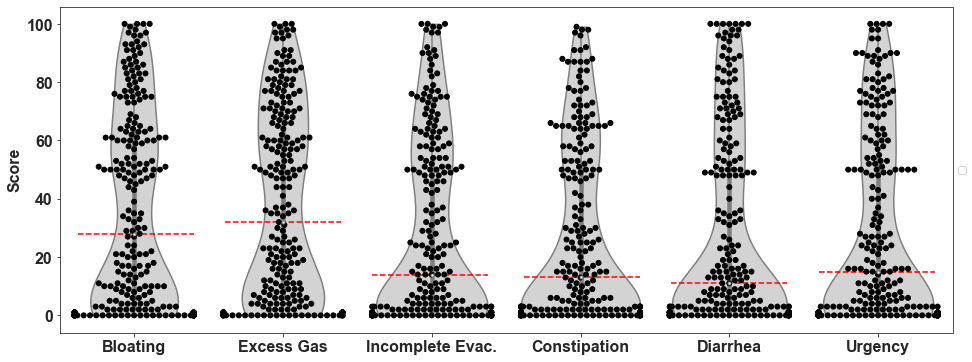

In [29]:
symptoms = ['bloating_vas', 'excess_gas_vas', 'incomplete_evac_vas', 
            'constipation_vas', 'diarrhea_vas', 'urgency_vas']
df_symptoms = pd.melt(df_metadata, value_vars=symptoms, var_name='Symptom', value_name='Value')

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

sns.swarmplot(ax=ax1, x='Symptom', y='Value', data=df_symptoms, color='k', edgecolor='k', linewidth=1)
sns.violinplot(ax=ax1, x='Symptom', y='Value', data=df_symptoms, color='lightgrey', cut=0)
ax1.set_ylabel('Score', fontsize=16, fontweight='bold')
ax1.set_xlabel('')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='None')
ax1.set_xticklabels(['Bloating', 'Excess Gas', 'Incomplete Evac.', 'Constipation', 'Diarrhea', 'Urgency'], fontsize=16)

ax1.axhline(28, xmin=0.02, xmax=0.15, ls='--', c='red')
ax1.axhline(32, xmin=0.185, xmax=0.315, ls='--', c='red')
ax1.axhline(14, xmin=0.35 , xmax=0.48 , ls='--', c='red')
ax1.axhline(13, xmin=0.52 , xmax=0.65 , ls='--', c='red')
ax1.axhline(11, xmin=0.685 , xmax=0.815 , ls='--', c='red')
ax1.axhline(15, xmin=0.85 , xmax=0.98 , ls='--', c='red')

#fig.savefig('pain_score_thresh.png', bbox_inches='tight', dpi=200)
#fig.savefig('pain_score_thresh.pdf', bbox_inches='tight')

In [42]:
for symptom in ['bloating_vas', 'excess_gas_vas', 'incomplete_evac_vas', 'constipation_vas', 'diarrhea_vas', 'urgency_vas']:   
    print(symptom + ": " + str(round(np.nanpercentile(df_metadata[symptom], 50),2)))

bloating_vas: 28.0
excess_gas_vas: 32.0
incomplete_evac_vas: 14.0
constipation_vas: 13.0
diarrhea_vas: 11.0
urgency_vas: 15.0


### Comparison of human duodenal microbial load to coprophagy mouse small intestinal load

In [31]:
copro_data = pd.read_csv('data_files/coprophagy_data.csv')
copro_data['Log Copies/mL'] = np.log10(copro_data['Copies/mL'])
copro_data = copro_data[copro_data['Group'].isin(['TC', 'RF'])]

In [43]:
_df = df_metadata[['Copies/mL', 'Log Copies/mL']].reset_index().rename(columns={'index':'Sample'})
_df['Group'] = ['Human Duodenum']*250
df_combined = pd.concat([_df,copro_data])

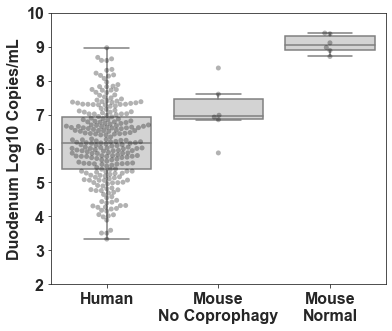

In [69]:
fig = plt.figure(figsize=[6,5])

ax1 = fig.add_subplot(111)

sns.boxplot(ax=ax1, x='Group', y='Log Copies/mL', data=df_combined, color='lightgrey', showfliers=False)
sns.swarmplot(ax=ax1, x='Group', y='Log Copies/mL', data=df_combined, color='k', alpha=0.3)

ax1.set_ylim(2,10)

ax1.set_ylabel('Duodenum Log10 Copies/mL', fontsize=16, fontweight='bold')

ax1.set_xticklabels(['Human','Mouse\nNo Coprophagy', 'Mouse\nNormal'], fontsize=16)
ax1.set_xlabel('', fontsize=16, fontweight='bold')

fig.savefig('copro_comp.png', bbox_inches='tight', dpi=200)
fig.savefig('copro_comp.pdf', bbox_inches='tight', transparent=True)

In [66]:
stats.kruskal(df_combined[df_combined['Group']=='Human Duodenum']['Log Copies/mL'].tolist(), df_combined[df_combined['Group']=='TC']['Log Copies/mL'].tolist())

KruskalResult(statistic=4.471315175097175, pvalue=0.03446845066532937)

In [67]:
stats.kruskal(df_combined[df_combined['Group']=='Human Duodenum']['Log Copies/mL'].tolist(), df_combined[df_combined['Group']=='RF']['Log Copies/mL'].tolist())

KruskalResult(statistic=17.41646692607003, pvalue=3.0021383248061575e-05)